# Testing SAM

In [38]:
import torch
import torchvision
import cv2
import sys
import numpy as np
import h5py
from matplotlib import pyplot as plt
from segment_anything import sam_model_registry, SamPredictor, SamAutomaticMaskGenerator
from pathlib import Path

In [58]:
def grayscale_to_rgb(image):
    return np.stack([image, image, image], axis=-1)

def normalize_minmax(img):
    return img - np.min(img) / (np.max(img) - np.min(img))

def preprocess_sam(img):
    img = 255 * normalize_minmax(img)
    img = img.astype(np.uint8)
    img = grayscale_to_rgb(img)
    return img

sam_checkpoint = "sam_vit_b_01ec64.pth"
model_type = "vit_b"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)
None

In [59]:
# Open the HDF5 file
DATA_FOLDER = Path("/home/fidelinus/tum/applied_machine_intelligence/final_project/data")
filepath = DATA_FOLDER / "sample01.pre"
file = h5py.File(filepath, 'r')

# Access the dataset
# List dataset in the file
amplitude = file['amplitude/images']
phase = file['phase/images']

# Loading model
mask_generator = SamAutomaticMaskGenerator(sam)

def show_anns(anns, ax):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)


# Using phase images

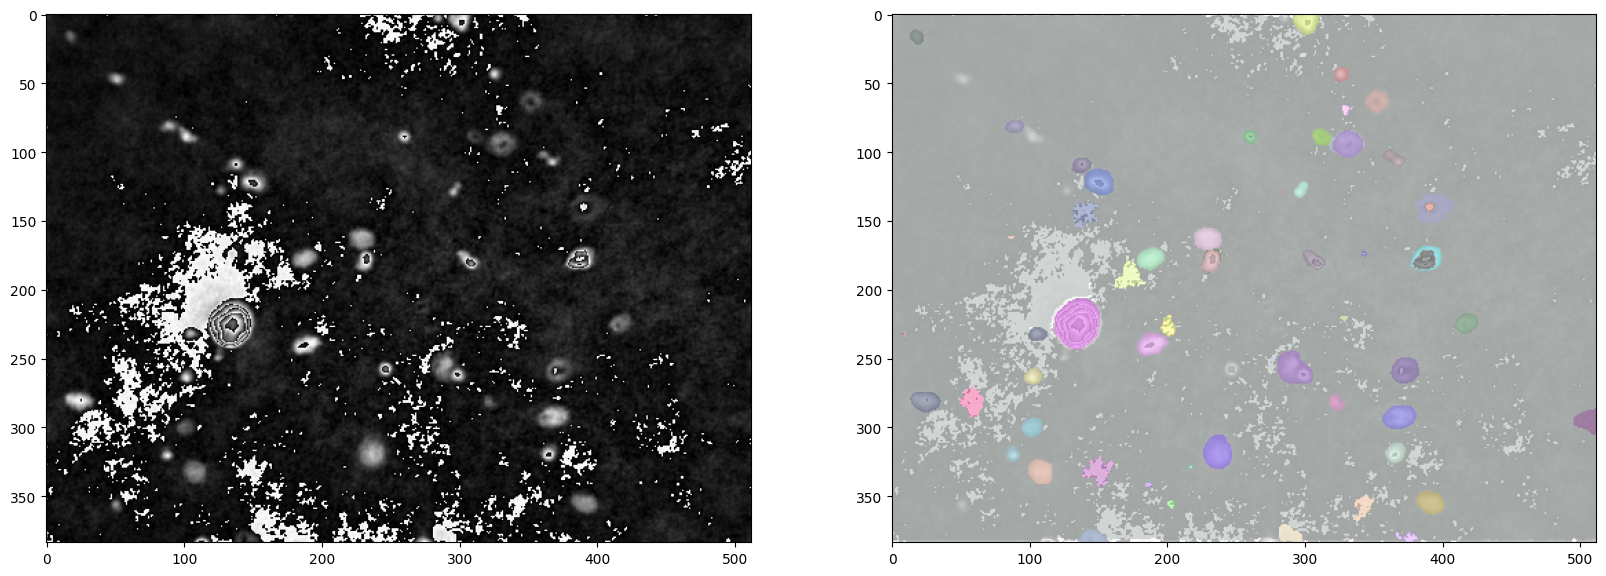

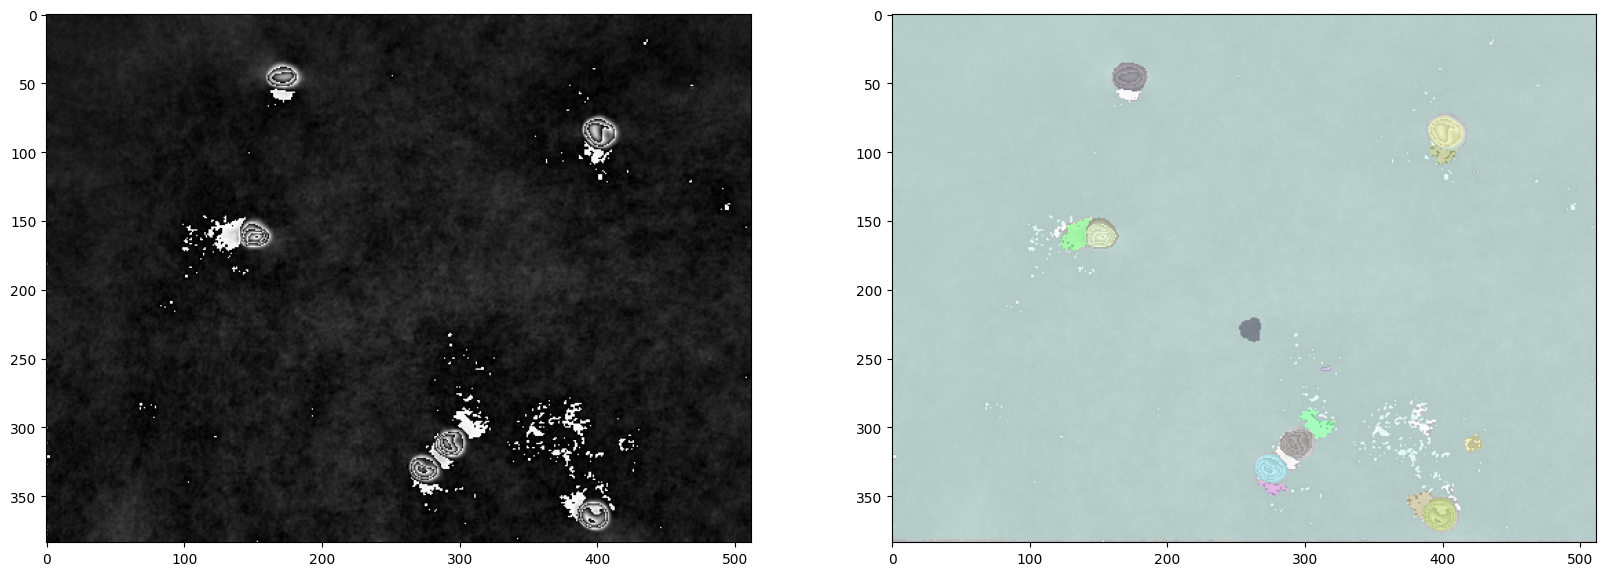

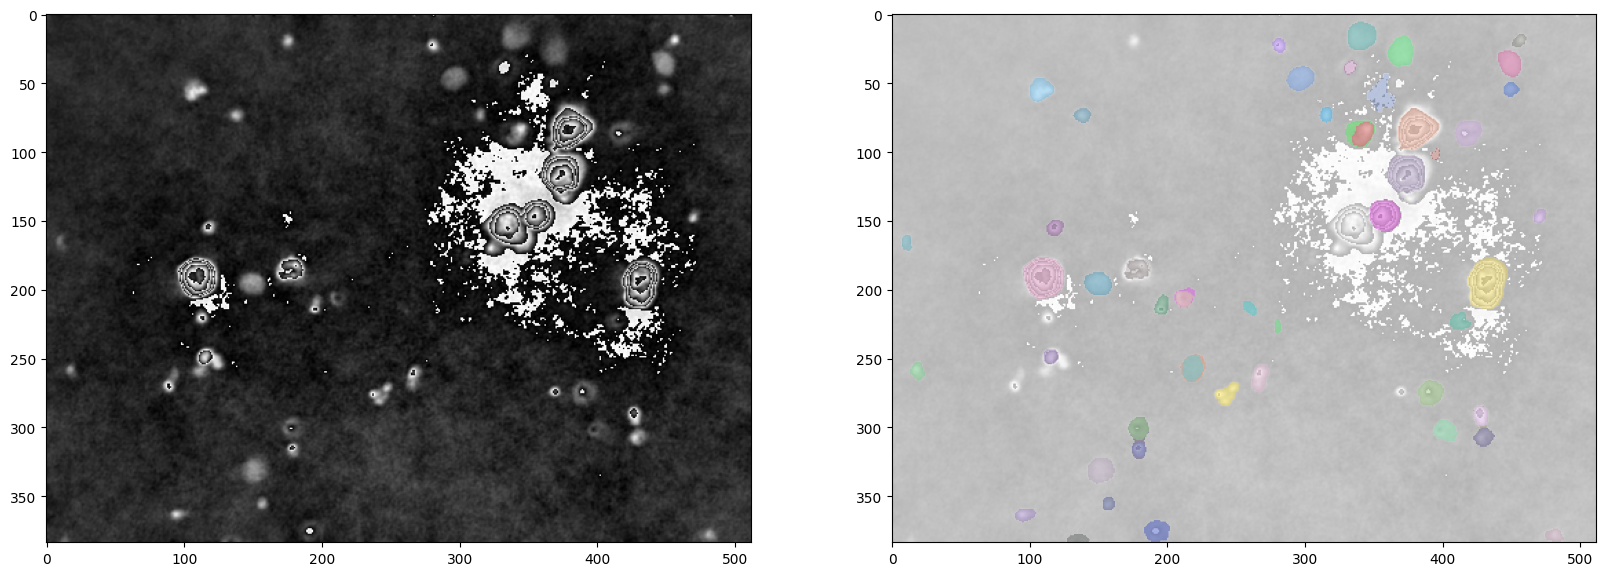

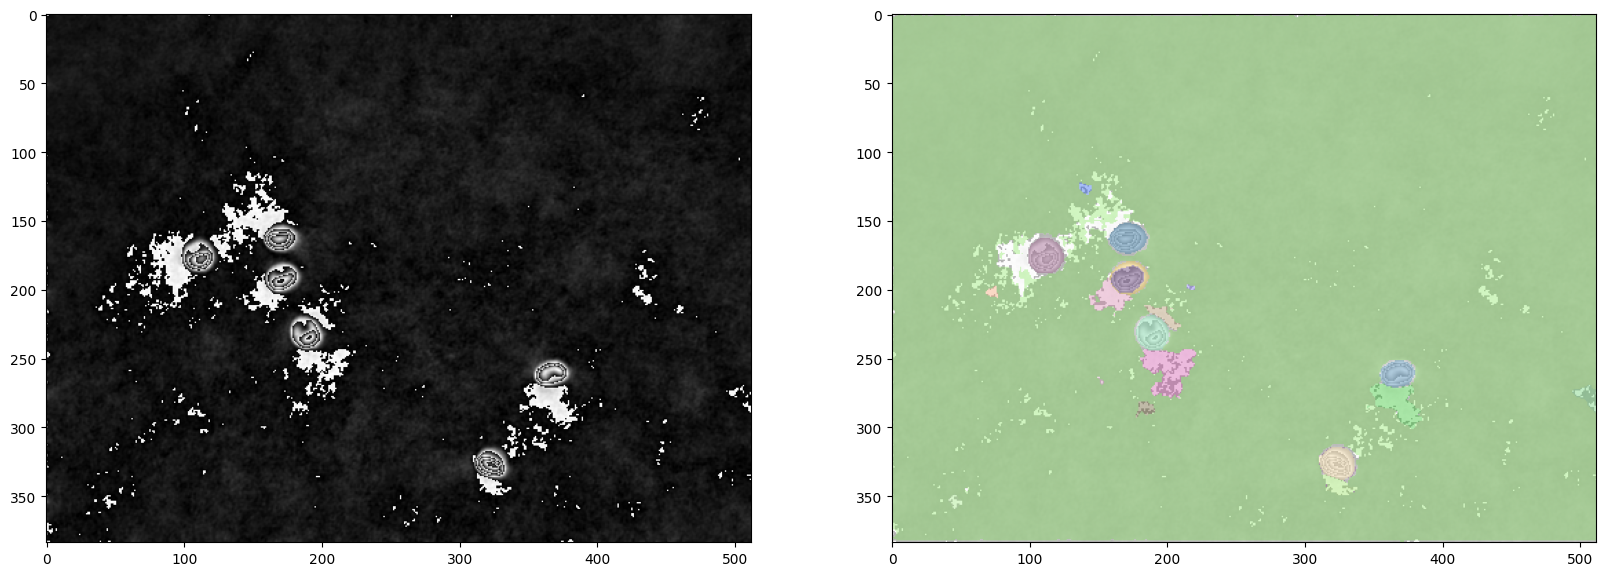

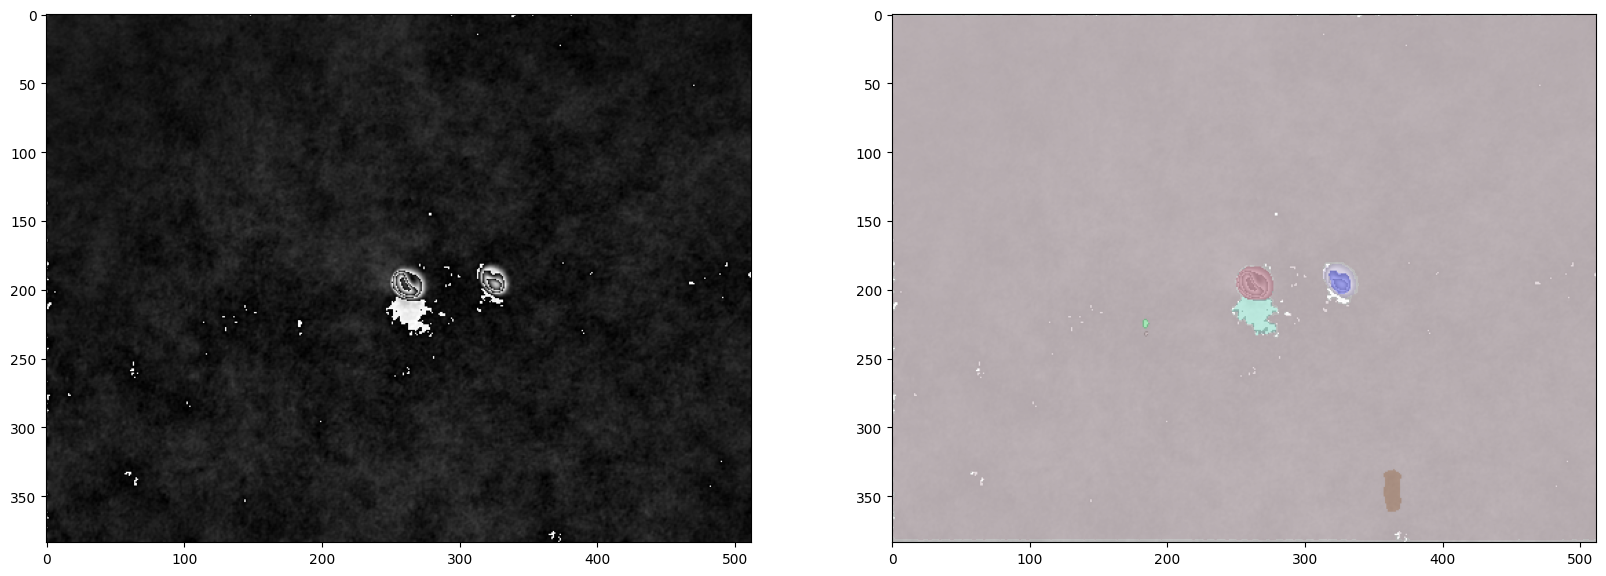

In [23]:
for img_ix in range(10, 15):
    phase_img = phase[img_ix]
    phase_img = preprocess_sam(phase_img)
    masks = mask_generator.generate(phase_img)

    fig, axes = plt.subplots(1, 2, figsize=(20, 20))
    axes[0].imshow(phase_img)
    axes[1].imshow(phase_img, alpha=0.3)
    show_anns(masks, axes[1])
    plt.show()

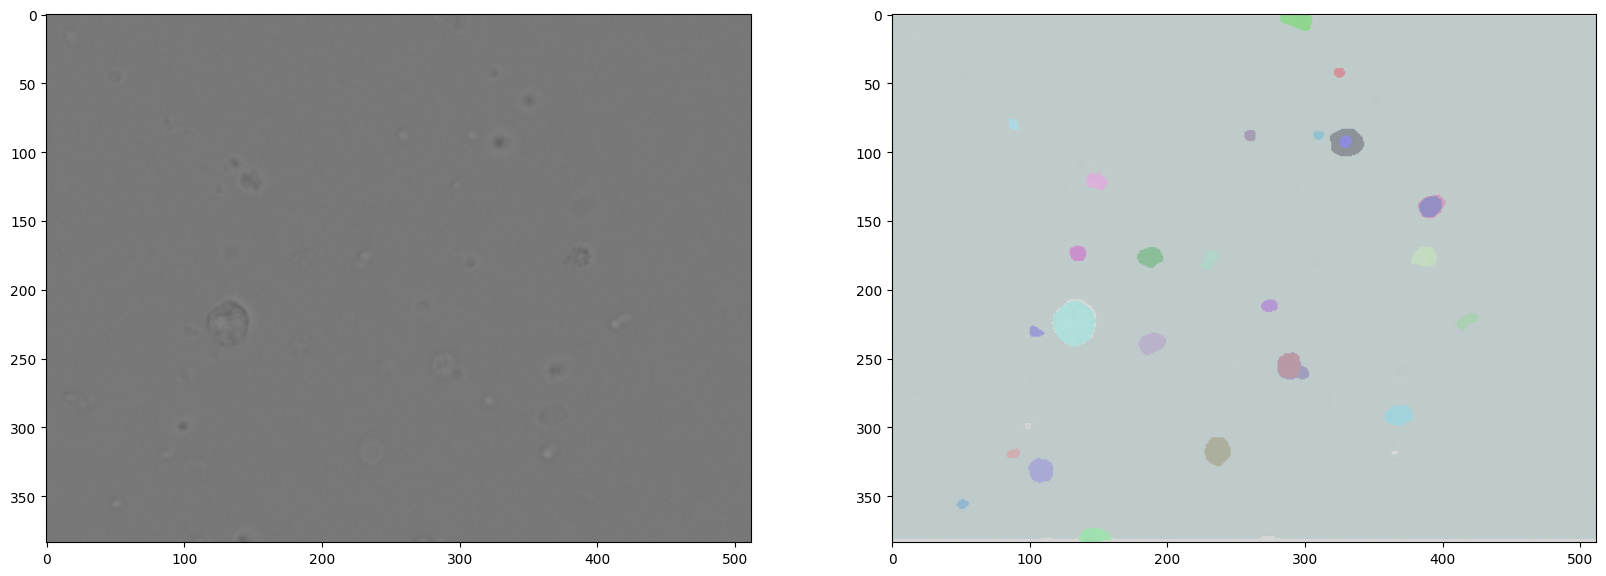

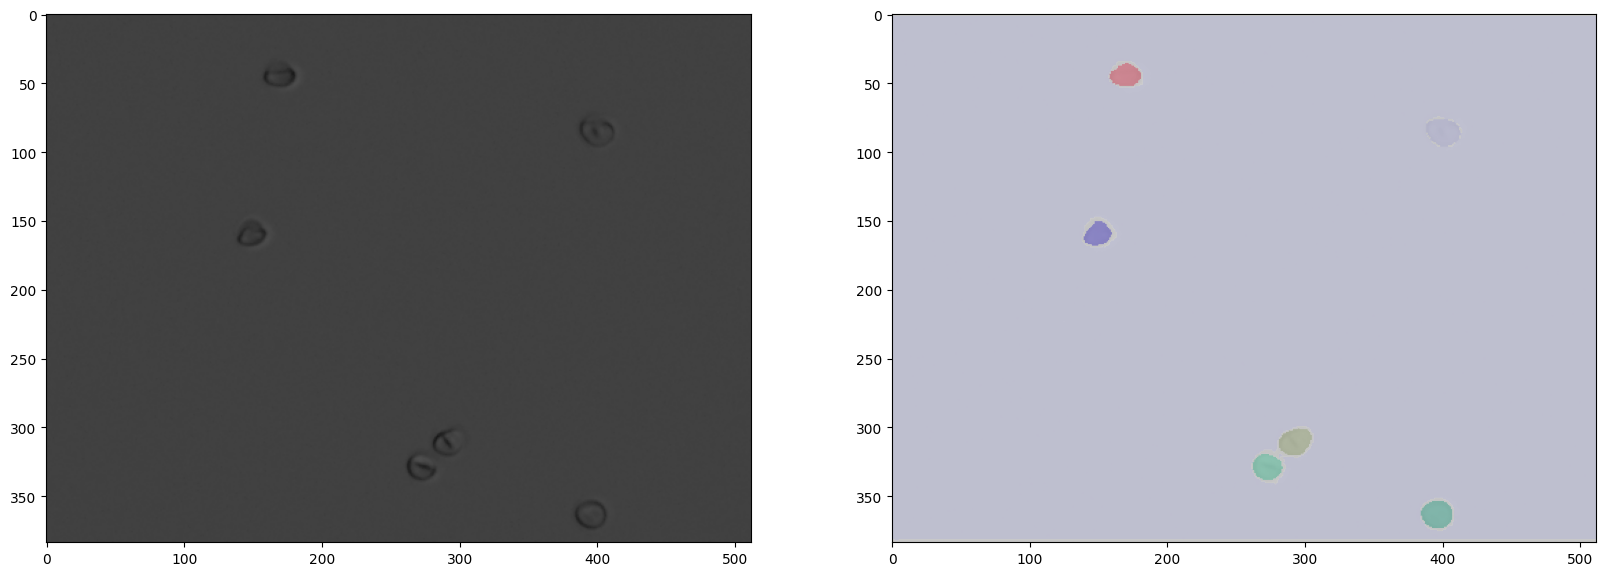

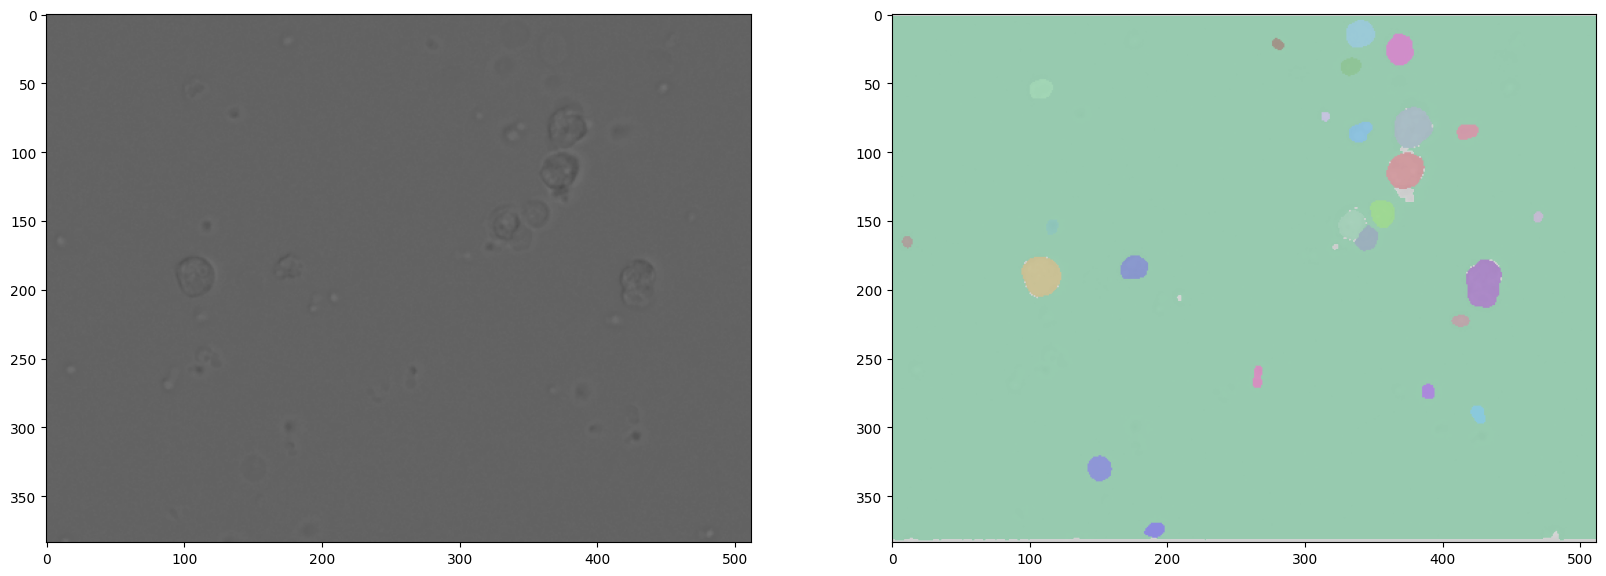

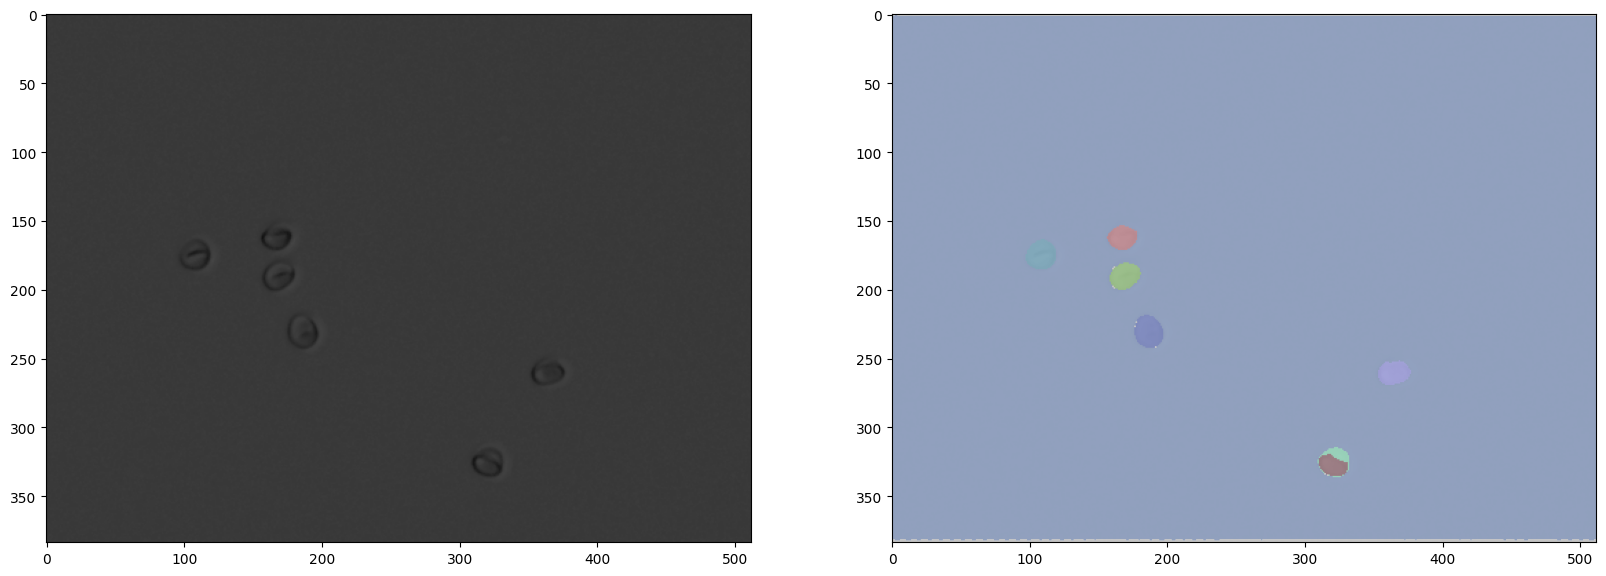

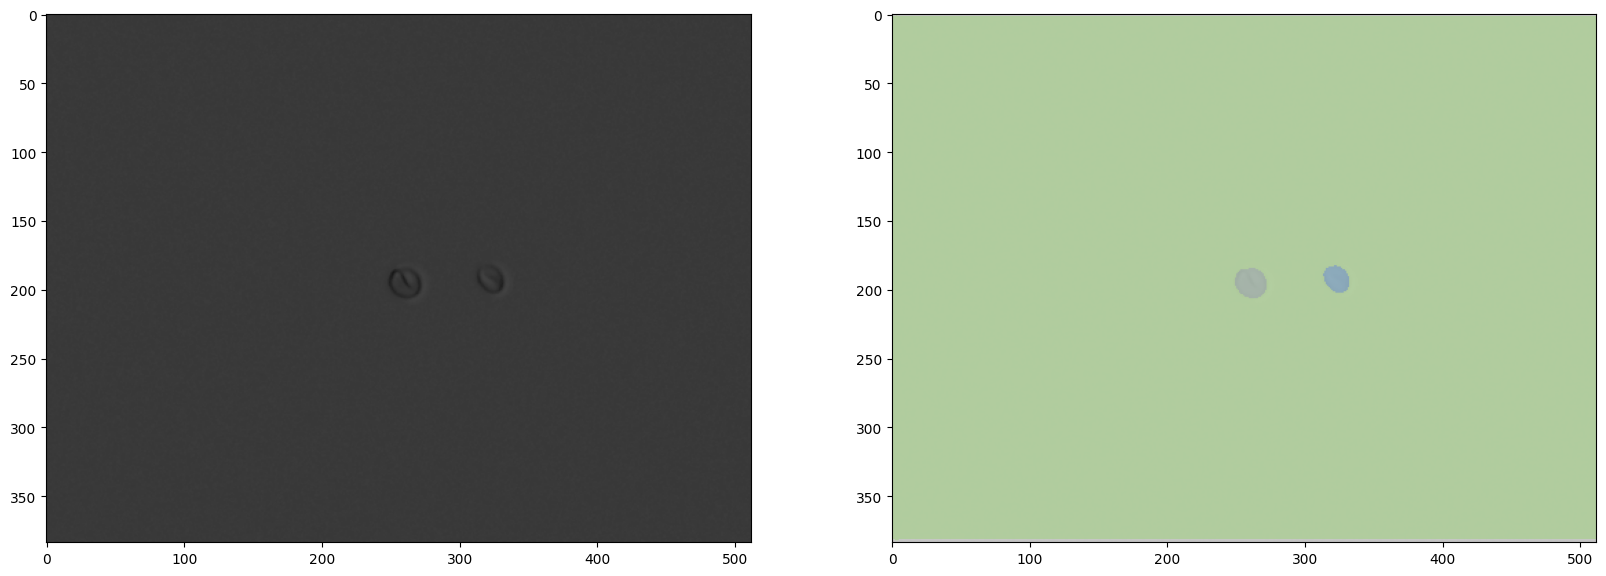

In [60]:
for img_ix in range(10, 15):
    img = amplitude[img_ix]
    img = preprocess_sam(img)
    masks = mask_generator.generate(img)

    fig, axes = plt.subplots(1, 2, figsize=(20, 20))
    axes[0].imshow(img)
    axes[1].imshow(img, alpha=0.3)
    show_anns(masks, axes[1])
    plt.show()